In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification, make_blobs
from sklearn.metrics  import accuracy_score

In [2]:
def plot_decision_boundary(X, Y, weights, bias):
    plt.scatter(X[:, 0], X[:, 1], c=Y);
    plt.plot((-bias - weights[1] * X[:, 1])/weights[0], X[:, 1]);
    
    y_pred = X @ weights + bias
    y_pred[y_pred >= 0] = 1
    y_pred[y_pred <  0] = -1
    accuracy = accuracy_score(Y, y_pred)
    print(f'Accuracy: {accuracy}')

## Linear Classifier

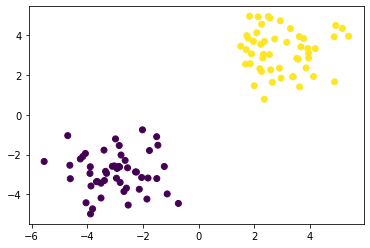

In [3]:
X, Y = make_blobs(n_samples = 100, centers = [(-3, -3), (3, 3)], 
                  random_state = 0, n_features = 2, cluster_std = 1)

Y[Y == 0] = -1

Y = Y.reshape(-1, 1)

plt.scatter(X[:, 0], X[:, 1], c=Y);

In [4]:
weights = np.array([
    [0.1],
    [0.1]
])

bias = 2
epochs = 140
lr = 1e-3

Accuracy: 0.5


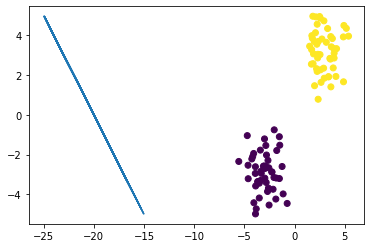

In [5]:
plot_decision_boundary(X, Y, weights, bias)

In [6]:
for epoch in range(epochs):
    linear_model = X @ weights + bias
    y_y_pred = Y * linear_model 
    loss = 0
    for i, pred in enumerate(y_y_pred):
        if pred < 1:
            # Calculate gradients
            dw1 = -Y[i] * X[i][0]
            dw2 = -Y[i] * X[i][1]
            db = -Y[i] * 1
            # update weights 
            weights[0] -= lr * dw1
            weights[1] -= lr * dw2
            bias -= lr * db
        loss += max(0, 1 - pred)
    if epoch % 10 == 0:
        print(f'Epoch: {epoch}, loss: {loss}')

Epoch: 0, loss: [120.59808016]
Epoch: 10, loss: [3.79420295]
Epoch: 20, loss: [2.23193588]
Epoch: 30, loss: [1.52506492]
Epoch: 40, loss: [1.06985908]
Epoch: 50, loss: [0.61465324]
Epoch: 60, loss: [0.32040655]
Epoch: 70, loss: [0.17410582]
Epoch: 80, loss: [0.12906139]
Epoch: 90, loss: [0.08401697]
Epoch: 100, loss: [0.03897255]
Epoch: 110, loss: 0
Epoch: 120, loss: 0
Epoch: 130, loss: 0


Accuracy: 1.0


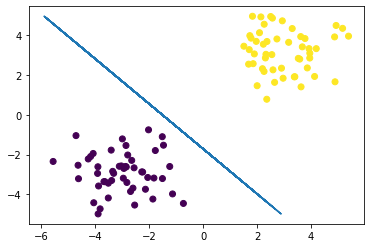

In [7]:
plot_decision_boundary(X, Y, weights, bias)

# Let's add derivative of distance

In [8]:
weights = np.array([
    [0.1],
    [0.1]
])

bias = 2
epochs = 140
lr = 1e-3

In [9]:
for epoch in range(epochs):
    linear_model = X @ weights + bias
    y_y_pred = Y * linear_model 
    
    support_vector = y_y_pred[y_y_pred > 0].min()
    weights /= support_vector
    bias    /= support_vector
    X       /= support_vector
    
    loss = 0
    for i, pred in enumerate(y_y_pred):
        if pred < 1:
            # Calculate gradients
            dw1 = -Y[i] * X[i][0] + weights[0] / np.linalg.norm(weights)
            dw2 = -Y[i] * X[i][1] + weights[1] / np.linalg.norm(weights)
            db = -Y[i] * 1
            # update weights 
            weights[0] -= lr * dw1
            weights[1] -= lr * dw2
            bias -= lr * db
        loss += max(0, 1 - pred)
    if epoch % 10 == 0:
        print(f'Epoch: {epoch}, loss: {loss}')

Epoch: 0, loss: [120.59808016]
Epoch: 10, loss: [4.59328588]
Epoch: 20, loss: 0
Epoch: 30, loss: 0
Epoch: 40, loss: 0
Epoch: 50, loss: 0
Epoch: 60, loss: 0
Epoch: 70, loss: 0
Epoch: 80, loss: 0
Epoch: 90, loss: 0
Epoch: 100, loss: 0
Epoch: 110, loss: 0
Epoch: 120, loss: 0
Epoch: 130, loss: 0


Accuracy: 1.0


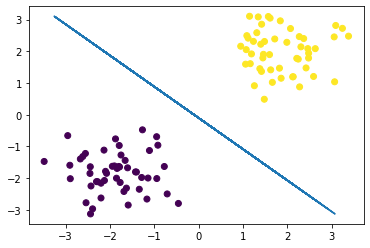

In [10]:
plot_decision_boundary(X, Y, weights, bias)

## Hard margin SVM class

In [24]:
class HardMarginSVM:
    """
    Если обучать на линейно не разделимом датасете то будет
    плозо обучаться так как будет выбирать рандомный decision
    boundary и под него оптимизироваться
    """
    def __init__(self, maximize_margin=False):
        self.maximize_margin = maximize_margin
        
        self.weights = np.array([
            [0.1],
            [0.1]
        ])

        self.bias = 2
        self.epochs = 140
        self.lr = 1e-3
        
    def fit(self, X, Y):
        for epoch in range(self.epochs):
            linear_model = self.predict(X)
            y_y_pred = Y * linear_model 
            
            normalized_X = X
            if self.maximize_margin:
                support_vector = y_y_pred[y_y_pred > 0].min()
                normalized_weights = self.weights / support_vector
                normalized_bias    = self.bias /  support_vector
                normalized_X       = X / support_vector  

            
            for i, pred in enumerate(y_y_pred):
                if pred < 1:
                    # Calculate gradients
                    dw1 = -Y[i] * normalized_X[i][0]
                    dw2 = -Y[i] * normalized_X[i][1]
                    
                    if self.maximize_margin:
                        dw1 += normalized_weights[0] / np.linalg.norm(normalized_weights)
                        dw2 += normalized_weights[1] / np.linalg.norm(normalized_weights)
                    
                    db = -Y[i] * 1
                    
                    # update weights 
                    self.weights[0] -= lr * dw1
                    self.weights[1] -= lr * dw2
                    self.bias -= lr * db
    
    def predict(self, X):
        linear_model = X @ self.weights + self.bias
        return linear_model

In [25]:
X, Y = make_blobs(n_samples = 100, centers = [(-3, -3), (3, 3)], 
                  random_state = 0, n_features = 2, cluster_std = 1)

Y[Y == 0] = -1

Y = Y.reshape(-1, 1)

Accuracy: 1.0


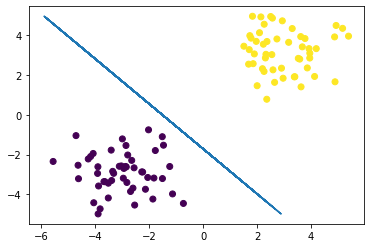

In [26]:
model = HardMarginSVM(maximize_margin=False)

model.fit(X, Y)

plot_decision_boundary(X, Y, model.weights, model.bias)

Accuracy: 1.0


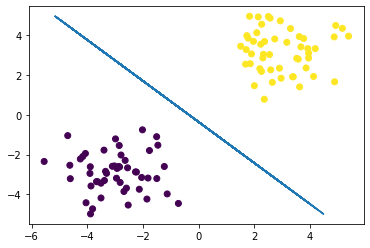

In [27]:
model = HardMarginSVM(maximize_margin=True)

model.fit(X, Y)

plot_decision_boundary(X, Y, model.weights, model.bias)